In [1]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


<IPython.core.display.Javascript object>


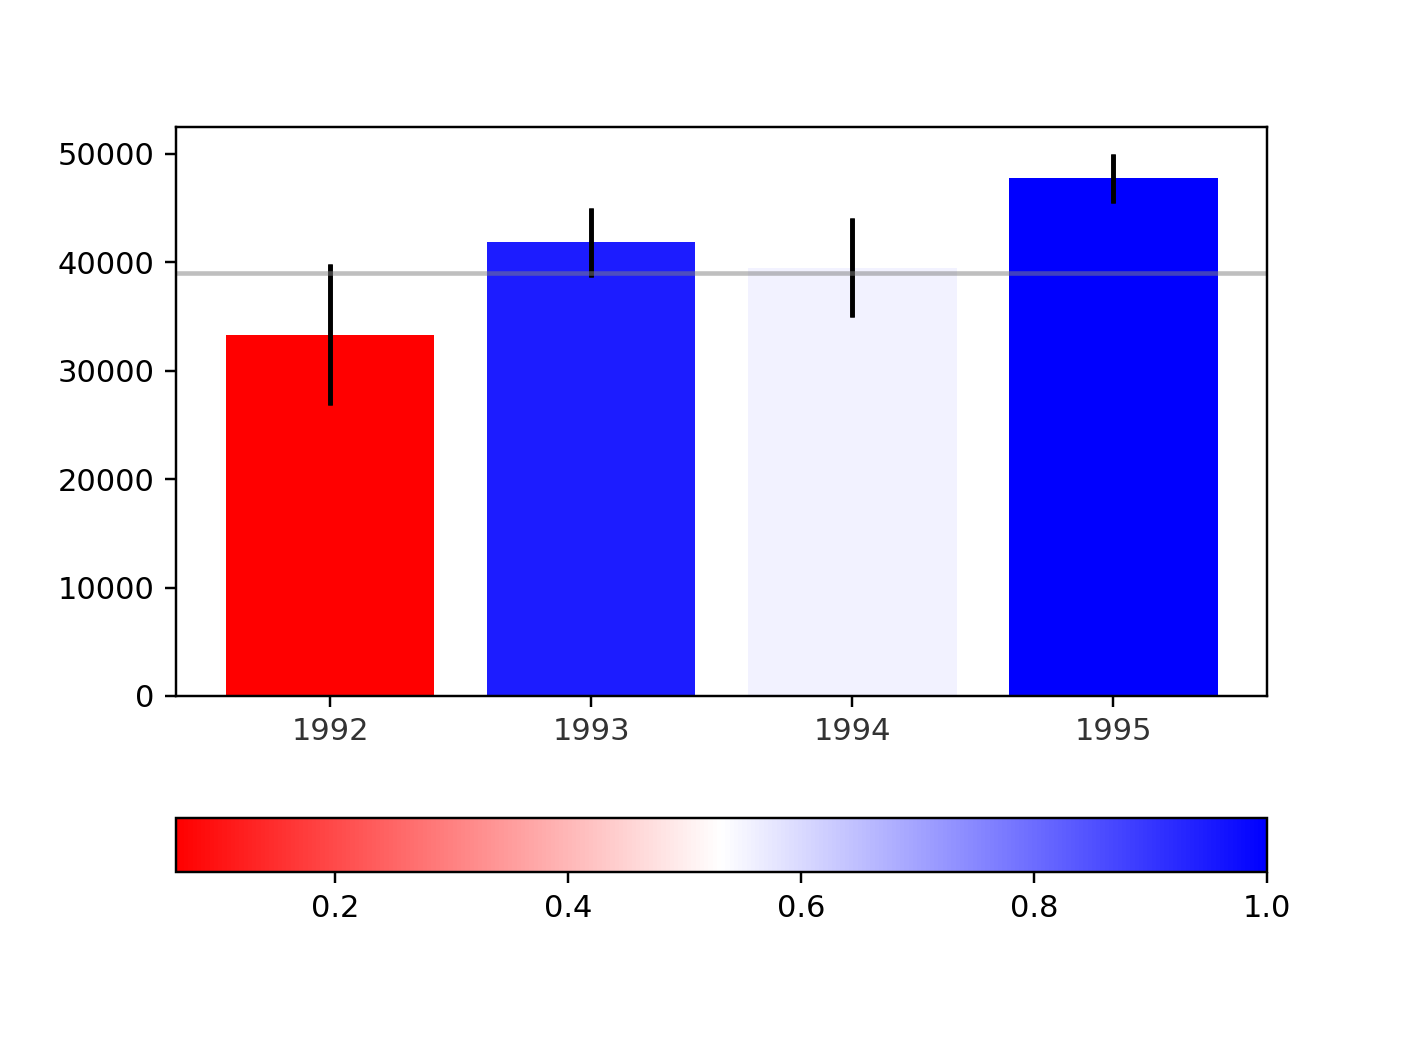

Chart updated


In [2]:
%matplotlib notebook

from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm

from ipywidgets import *
#from notebook.display import display
from IPython.display import display

def set_colors():
    color_map = mcol.LinearSegmentedColormap.from_list("MyCmapName", ["red", "white", "blue"])
    color_pick = cm.ScalarMappable(cmap = color_map)
    color_pick.set_array([])

    return color_pick

def calculate_percentages(threshold):
    percentages = []

    for bar, yerr_ in zip(bars, yerr):
        low = bar.get_height() - yerr_
        high = bar.get_height() + yerr_
        percentage = (high - threshold) / (high - low)

        if percentage > 1: percentage = 1

        if percentage < 0: percentage = 0

        percentages.append(percentage)

    return percentages

def choose_and_update_colors(cpick, percentages):
    colors_by_percentage = cpick.to_rgba(percentages)

    bars = plt.bar(
        range(df.shape[0]),
        year_avg,
        yerr = yerr,
        color = colors_by_percentage)
    plt.colorbar(cpick, orientation='horizontal')
    plt.xticks(range(df.shape[0]), df.index, alpha = 0.8)

def update_threshold(sender):
    threshold = int(text.value)
    plt.axhline(y = threshold, color = 'grey', alpha = 0.5)

    percentages = calculate_percentages(threshold)
    color_pick = set_colors()
    choose_and_update_colors(color_pick, percentages)

    print('Chart updated')

def do_initial_plot(df):
    global bars, yerr, year_avg, year_std
    year_avg = df.mean(axis = 1)
    year_std = df.std(axis = 1)
    yerr = year_std / np.sqrt(df.shape[1]) * stats.t.ppf(1-0.05/2, df.shape[1]-1)

    plt.figure()
    plt.show()
    bars = plt.bar(
        range(df.shape[0]),
        year_avg,
        yerr = yerr,
        color = 'lightgray')

# displaying the text widget
text = widgets.Text(description="Threshold", width=200)
text.on_submit(update_threshold)
display(text)

global bars, yerr, year_avg, year_std
do_initial_plot(df)
